### Problem Statement:
**Analyze employee_attrition.csv dataset provided. The dataset provides a variety of information about the employees, such as demographics, time on job, etc. and also if they stay with or leave the company(as in binary attribute “Attrition” with No means stay and Yes means leaving).**

R Shiny App: https://tan305.shinyapps.io/DataAnalyticsHW1/

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
pd.set_option("display.max_columns",None) #helps in displaying all the columns
pd.options.display.max_colwidth = 100

In [3]:
data=pd.read_csv("employee_attrition.csv") #reads the data from the csv file

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,4,Male,96,3,2.0,Sales Executive,3,Married,5301,2939,8,Y,No,15.0,3.0,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,4,Female,82,3,2.0,Laboratory Technician,3,Married,3149,21821,8,Y,No,20.0,4.0,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,3,Female,68,2,2.0,Sales Executive,3,Single,6244,7824,7,Y,No,17.0,3.0,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,4,Male,37,2,4.0,Healthcare Representative,2,Divorced,13577,25592,1,Y,Yes,15.0,3.0,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,4,Female,91,2,3.0,Healthcare Representative,2,Single,8606,21195,1,Y,No,19.0,3.0,4.0,80,0,11.0,3,1,11,8,3.0,3


# Data Cleaning

***To clean the data we will be do the following steps:
<br>1) Remove columns with one unique value or if all the rows are unique in a column.
<br>2) Fill the missing value.
<br>3) Remove column which have very high correlation with other column.
<br>4) Treat the outliers.***

### 1) Remove columns with one unique value or if all the rows are unique in a column.

*First, we check for number of unique values in each column.*

In [5]:
for i in data.columns:
    print(i+":",data[i].nunique())

Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 769
Department: 3
DistanceFromHome: 30
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1176
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1096
MonthlyRate: 1149
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 41
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 19


*Removing the columns which have 1 unique value because it will not help us in any way to analyse our data.*

In [6]:
data.drop(["EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

*Removing the columns which have all row unique because we won't be able to find any pattern making it useless for our analysis.*

In [7]:
data.drop("EmployeeNumber",axis=1,inplace=True)

### 2) Fill the missing value.

*Below codes gives the count for number of missing values in the column.*

In [8]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            2
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    1
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    1
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    1
StockOptionLevel            0
TotalWorkingYears           2
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     1
YearsWithCurrManager        0
dtype: int64

*Also, we plot the correlation matrix to look for columns which have high correlation. This matrix can help us to impute missing values for columns with high correlation.*

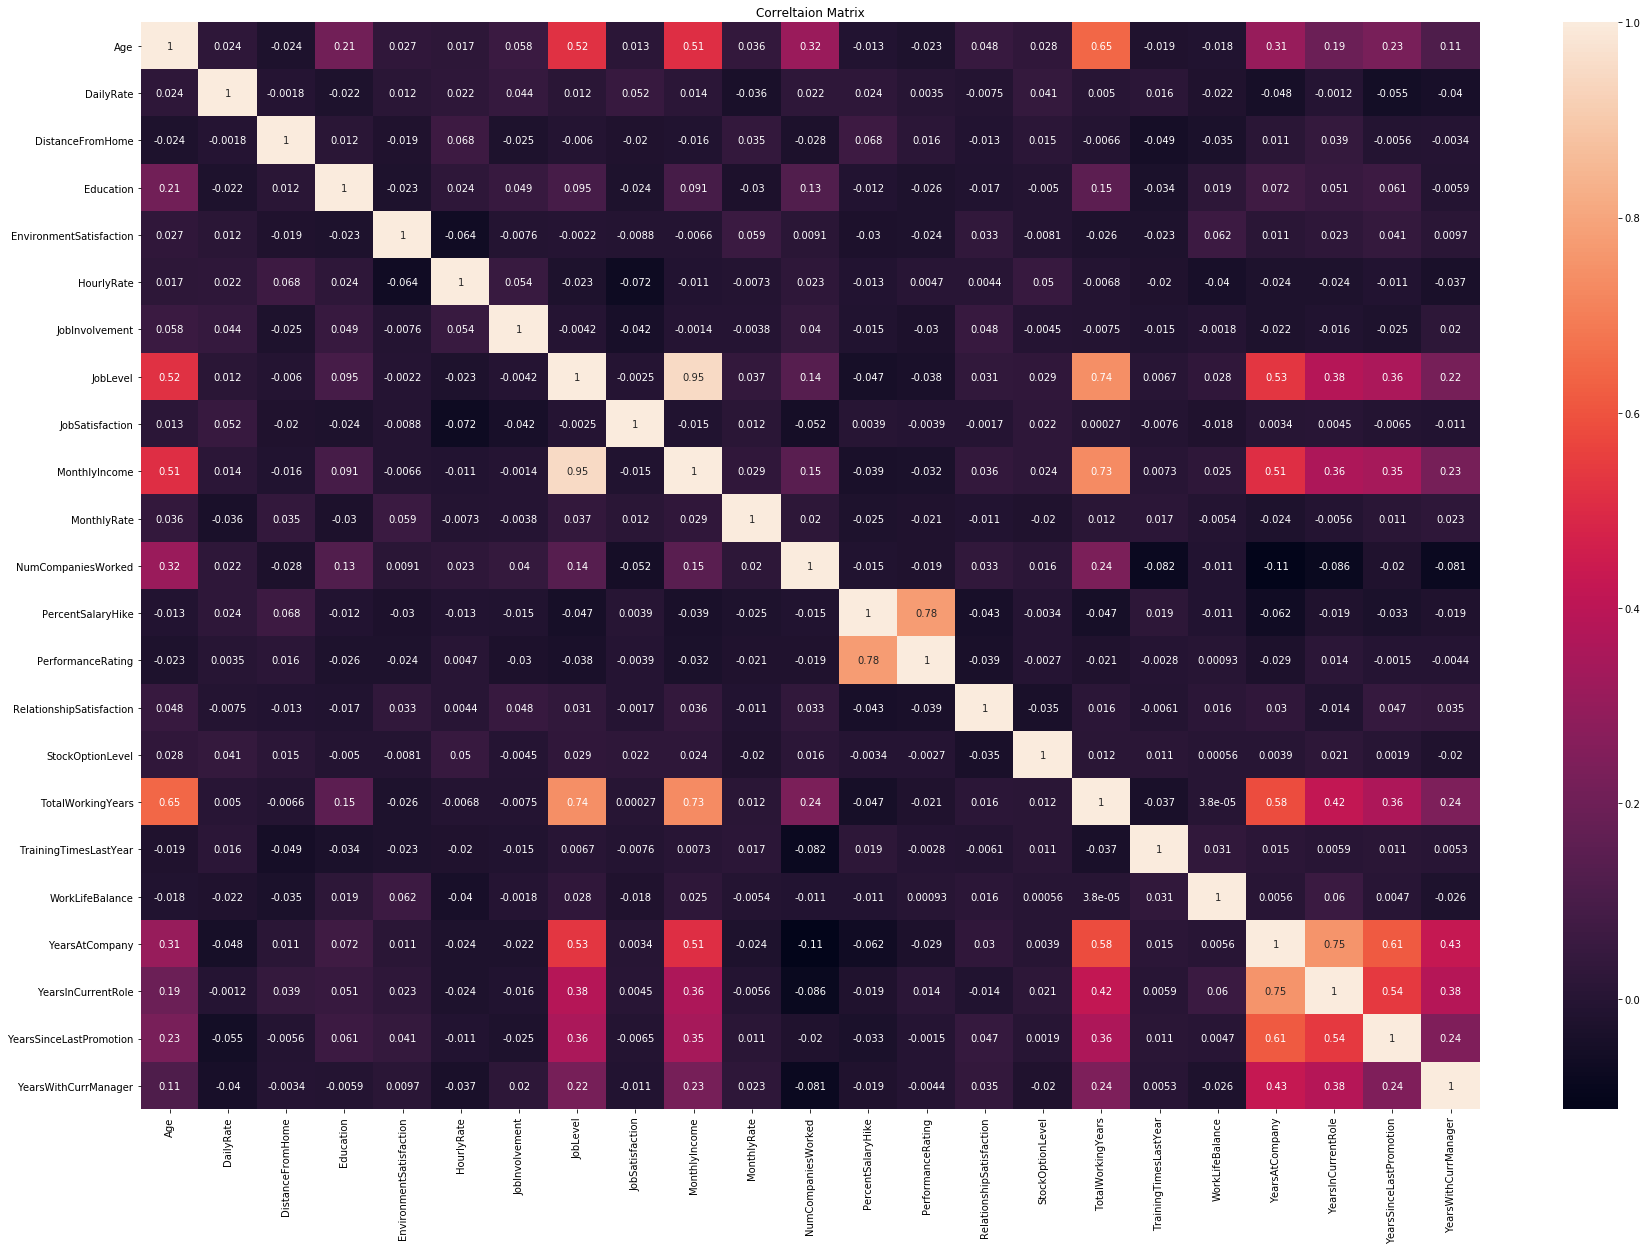

In [9]:
plt.figure(figsize=(30,20))
plt.title("Correltaion Matrix");
sns.heatmap(data.corr(),annot=True);

*DistanceFromHome: We use the median value as the data exhibits skewness. We can safely do this because the number of missing values is less. So, it won't affect the performance of our model.* 

In [10]:
data.DistanceFromHome.fillna(np.nanmedian(data.DistanceFromHome),inplace=True)

*Gender: We use the mode value as it is nominal variable and the number of missing values is just 1.* 

In [11]:
data.Gender.fillna(statistics.mode(data.Gender),inplace=True)

*Job Level: The Job Level column has a high correlation with Total Working Years. So, with the help of that column we will be imputing the missing value for the Job Level. First we calculated the mean and median, it was found that for each job level the mean and median is very close. As the closest job level for someone with 9 Total Working Years is 2. So, I decided to assign that value.*

In [12]:
print("Mean of Total Working Years for each Job Level:")
print(data.groupby(["JobLevel"])["TotalWorkingYears"].mean())

Mean of Total Working Years for each Job Level:
JobLevel
1.0     5.983683
2.0    10.222222
3.0    16.000000
4.0    25.927711
5.0    26.157895
Name: TotalWorkingYears, dtype: float64


In [13]:
print("Median of Total Working Years for each Job Level")
print(data.groupby(["JobLevel"])["TotalWorkingYears"].median())

Median of Total Working Years for each Job Level
JobLevel
1.0     6.0
2.0    10.0
3.0    14.0
4.0    26.0
5.0    24.0
Name: TotalWorkingYears, dtype: float64


In [14]:
print("Total Working Years for the row which has a missing value in the Job Level Column:")
print(data[data.JobLevel.isnull()].TotalWorkingYears)

Total Working Years for the row which has a missing value in the Job Level Column:
88    9.0
Name: TotalWorkingYears, dtype: float64


In [15]:
data.JobLevel.fillna(2,inplace=True) #Fills the missing value with 2

*Total Working Years: Here, we will do the opposite of what we did to fill the missing values in the Job Level column. We will use the Job Level to estimate the missing values in the Total Working Years column.*

In [16]:
data[data.TotalWorkingYears.isnull()] # prints that rows with missing TotalWorkingYears

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
82,38,No,Travel_Rarely,362,Research & Development,1.0,1,Life Sciences,3,Female,43,3,1.0,Research Scientist,1,Single,2619,14561,3,No,17.0,3.0,4.0,0,NaN,3,2,0,0,0.0,0
968,39,Yes,Travel_Frequently,203,Research & Development,2.0,3,Life Sciences,1,Male,84,3,4.0,Healthcare Representative,4,Divorced,12169,13547,7,No,11.0,3.0,4.0,3,NaN,4,3,18,7,11.0,5


In [17]:
#Using the medians of Total Working Years for a person with Job Level 1 and 4 we get these values and fill it 
data.TotalWorkingYears[82]=6
data.TotalWorkingYears[968]=24

*PercentSalaryHike: We will be doing something similar to what we did for Job Level and TotalWorkingYears. Both the columns are having good correlation so we use the same technique.*

In [18]:
data.groupby(["PerformanceRating"])["PercentSalaryHike"].median() #Finds the median for each unique Performance Rating

PerformanceRating
3.0    14.0
4.0    22.0
Name: PercentSalaryHike, dtype: float64

In [19]:
data.groupby(["PerformanceRating"])["PercentSalaryHike"].mean() # Finds the mean for each unique Performance Rating

PerformanceRating
3.0    14.034588
4.0    21.806283
Name: PercentSalaryHike, dtype: float64

In [20]:
data[data.PercentSalaryHike.isnull()].PerformanceRating # Finds the performance rating for the row where the Percent Hike 
                                                        # value is missing

63    3.0
Name: PerformanceRating, dtype: float64

In [21]:
data.PercentSalaryHike.fillna(14,inplace=True) # Fills the median of the Percent Hike with Performance Rating as 3.

*Performance Rating: We take the help of PercentHike column to fill the missing value.*

In [22]:
data[data.PerformanceRating.isna()] #Prints the row where PerformanceRating is missing.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
9,27,Yes,Travel_Rarely,1420,Sales,2.0,1,Marketing,3,Male,85,3,1.0,Sales Representative,1,Divorced,3041,16346,0,No,11.0,NaN,2.0,1,5.0,3,3,4,3,0.0,2


In [23]:
data[data.PerformanceRating.isna()].PercentSalaryHike # Prints the Percent Salary Hike where the Performance Rating 
                                                      # value is missing

9    11.0
Name: PercentSalaryHike, dtype: float64

In [24]:
data.PerformanceRating.fillna(3,inplace=True) # Using the Percent Salary Hike, it fills with the corresponding Performance
                                              # Rating. 

*Overtime: We use the mode value as it is nominal variable and the number of missing values is just 1.
 <br>RelationashipSatisfaction: We do the same as above.
 <br>YearsSinceLastPromotion: We can't derive any information to assign a meaningful value to it. We just simply assign it 0.*


In [25]:
data.OverTime.fillna(statistics.mode(data.OverTime),inplace=True)
data.RelationshipSatisfaction.fillna(3,inplace=True)
data.YearsSinceLastPromotion.fillna(0,inplace=True)

In [26]:
print("Number of total missing value:",data.isna().sum().sum()) #We check if there are any missing values in our dataframe.

Number of total missing value: 0


### 3) Remove column which have very high correlation with other column.

*Due to high correlation between Monthly Income and Job Level, we will drop the Monthly Income column out of the two columns.
As Job Level is already a categorical variable, so we won't need to do any preprocessing in order to use in the association rule
model.*

In [27]:
data.drop("MonthlyIncome",axis=1,inplace=True)

In [28]:
g=data.columns.to_series().groupby(data.dtypes).groups
data_types={k.name: v for k, v in g.items()}

In [29]:
for i in data_types["object"]:
    print(i+":",data[i].unique())

Attrition: ['No' 'Yes']
BusinessTravel: ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Medical' 'Marketing' 'Other' 'Human Resources'
 'Technical Degree']
Gender: ['Male' 'Female']
JobRole: ['Sales Executive' 'Laboratory Technician' 'Healthcare Representative'
 'Manager' 'Manufacturing Director' 'Sales Representative'
 'Human Resources' 'Research Scientist' 'Research Director']
MaritalStatus: ['Married' 'Single' 'Divorced']
OverTime: ['No' 'Yes']


### 3) Treating the outliers

*From the plot we can see that there is one outlier for the Distance From Home column.*

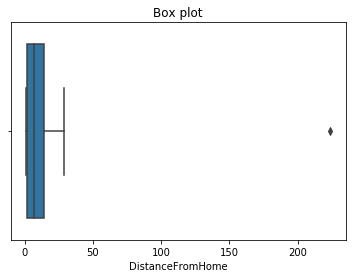

In [30]:
sns.boxplot(data.DistanceFromHome);
plt.title("Box plot");

In [31]:
data[data.DistanceFromHome>200] #We print the row which has distance from home greater than 200

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
126,31,No,Travel_Rarely,1062,Research & Development,224.0,3,Medical,3,Female,96,2,2.0,Healthcare Representative,1,Single,17198,1,No,19.0,3.0,2.0,0,10.0,2,3,10,9,1.0,8


*Maybe if a person is working remotely or mostly works from home, the travel distance to office can be large. So, we don't
change this value. We just assign the distance to the category of very far later.*

*From the below histogram plot, there seems to be a outlier in the data because the total working years is greater than 100.*

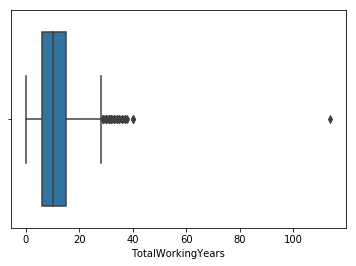

In [32]:
sns.boxplot(data.TotalWorkingYears);

*To investigate this we print all the rows where the Total Working years is greater than 40. After doing so, we found that the
Total Working years is 114 which is definitely a outlier since the age of that employee is 36. So, we can interpret this as an 
error caused while data entry. To correct it, a person with an age of 36 must have worked on an average of 14 years so we assign Total Working Years for this employee to be 14.*

In [33]:
data[data.TotalWorkingYears>40]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
143,36,No,Travel_Frequently,541,Sales,3.0,4,Medical,1,Male,48,2,3.0,Sales Executive,4,Married,7246,4,No,11.0,3.0,1.0,1,114.0,2,3,13,9,1.0,12


In [34]:
data.TotalWorkingYears[143]=14 #Changes the value to 14

*From the below histogram plot, there seems to be a outlier in the data because the years with current manager is greater than
100.*

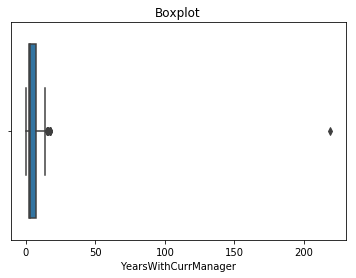

In [35]:
sns.boxplot(data.YearsWithCurrManager);
plt.title("Boxplot");

*Here, we first print the row with YearsWithCurrentManager as a value greater than 100. Next, we plot the histogram plot of the
variable to understand the distribution and assign the missing valu accordingly.*

In [36]:
data[data.YearsWithCurrManager>50]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1054,42,No,Non-Travel,495,Research & Development,2.0,1,Life Sciences,3,Male,37,3,4.0,Manager,3,Married,26582,0,Yes,13.0,3.0,4.0,0,21.0,3,2,20,8,2.0,219


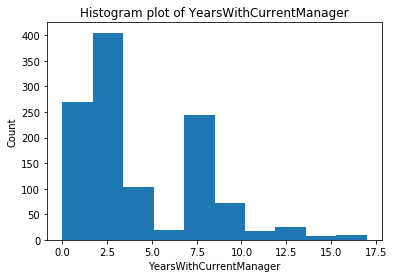

In [37]:
plt.hist(data[data.YearsWithCurrManager<50].YearsWithCurrManager);
plt.ylabel("Count")
plt.xlabel("YearsWithCurrentManager")
plt.title("Histogram plot of YearsWithCurrentManager");

*We simply use the median value, it will be difficult to derive any value from other columns or use any other information to
assign a value.*

In [38]:
data.YearsWithCurrManager[1054]=data.YearsWithCurrManager.median(skipna=True)

### Data Transformations

**Since the data that we input to association rule model should be strictly of categorical form, we convert all our columns to
fulfill this condition**

In [39]:
#Convert the DistanceFromHome column into categorical form 
data.DistanceFromHome=pd.cut(data.DistanceFromHome, [0,5,15,250], include_lowest =True, labels = ['Near','Far','Very_Far'])

In [40]:
#Convert the TotalWorkingYears column into categorical form 
data.TotalWorkingYears=pd.cut(data.TotalWorkingYears, [0,5,8,12,50], include_lowest =True, labels = ['Fresher','Little_Experience','Good_Experience','Highly_Experienced'])

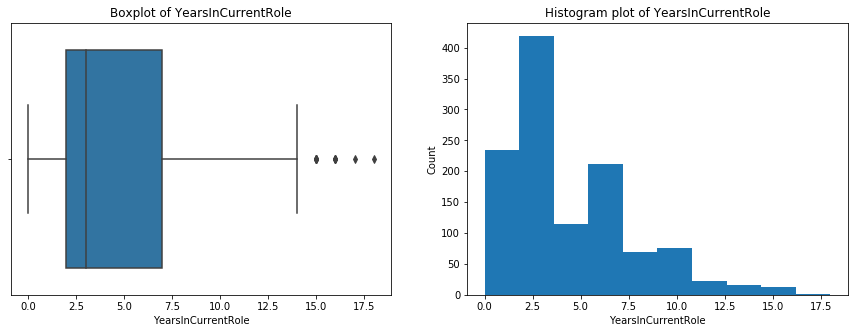

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data.YearsInCurrentRole,ax=ax[0]).set_title("Boxplot of YearsInCurrentRole");
ax[1].hist(data.YearsInCurrentRole)
ax[1].set_title("Histogram plot of YearsInCurrentRole");
ax[1].set_xlabel("YearsInCurrentRole");
ax[1].set_ylabel("Count");

In [42]:
# First we try to understand the distribution of the data from the above plot. Then, we decide how we bin our data into 
# categorical form.  
data.YearsInCurrentRole=pd.cut(data.YearsInCurrentRole, [0,2,5,8,20], include_lowest =True, labels = ['Under_2','Under_5','Under_8',"Over_8"])

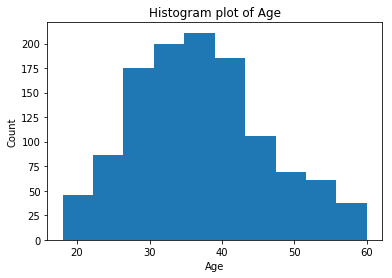

In [43]:
plt.title("Histogram plot of Age")
plt.hist(data.Age);
plt.xlabel("Age")
plt.ylabel("Count");

*From the above plot we can see that the data is normally distributed. So, we can bin the data into four categories using the
four quantiles.*

In [44]:
data.Age=pd.qcut(data.Age,4,labels=["Young_Adults","Middle_Aged_Adult","Elderly","Old_Adult"])

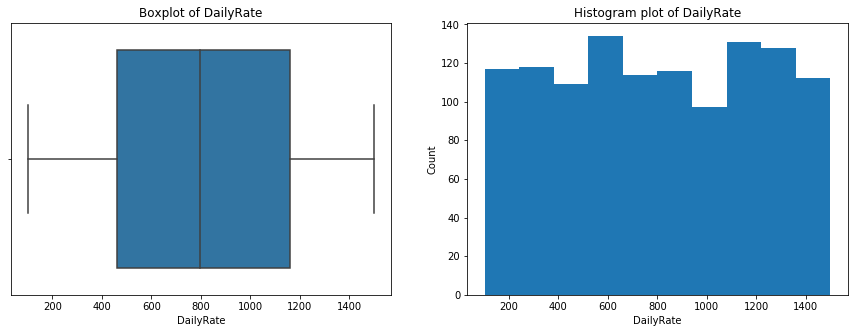

In [45]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data.DailyRate,ax=ax[0]).set_title("Boxplot of DailyRate");
ax[1].hist(data.DailyRate)
ax[1].set_title("Histogram plot of DailyRate");
ax[1].set_xlabel("DailyRate");
ax[1].set_ylabel("Count");

In [46]:
#The above plot shows that data is uniformaly distributed, so we bin the data into 3 categories.
data.DailyRate=pd.cut(data.DailyRate, [0,500,1000,1500], include_lowest =True, labels = ['Low','Medium','High'])

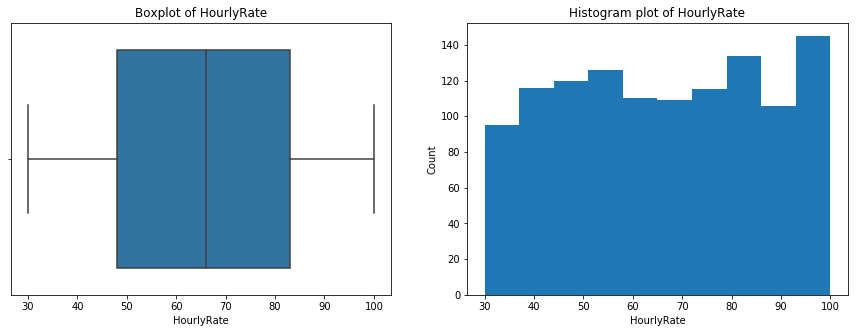

In [47]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data.HourlyRate,ax=ax[0]).set_title("Boxplot of HourlyRate");
ax[1].hist(data.HourlyRate)
ax[1].set_title("Histogram plot of HourlyRate");
ax[1].set_xlabel("HourlyRate");
ax[1].set_ylabel("Count");

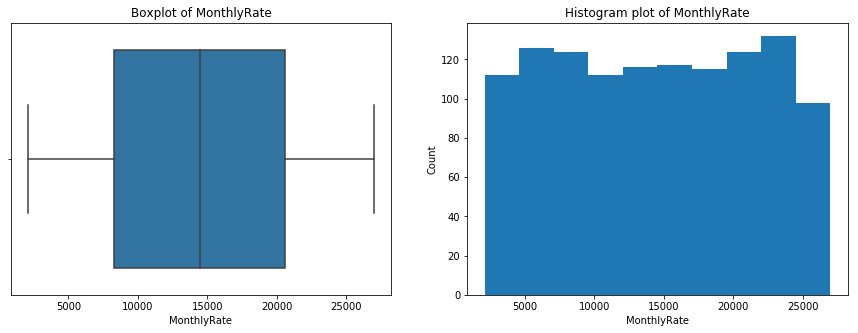

In [48]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data.MonthlyRate,ax=ax[0]).set_title("Boxplot of MonthlyRate");
ax[1].hist(data.MonthlyRate)
ax[1].set_title("Histogram plot of MonthlyRate");
ax[1].set_xlabel("MonthlyRate");
ax[1].set_ylabel("Count");

In [49]:
#Since hourly and daily rate both have a uniform distribution, we simply categorize into three groups having equal probability.
data.HourlyRate=pd.qcut(data.HourlyRate,3, labels = ['Low','Medium','High'])
data.MonthlyRate=pd.qcut(data.MonthlyRate,3, labels = ['Low','Medium','High'])

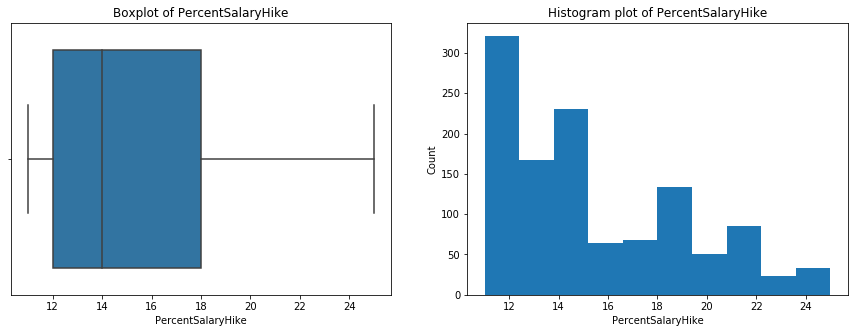

In [50]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data.PercentSalaryHike,ax=ax[0]).set_title("Boxplot of PercentSalaryHike");
ax[1].hist(data.PercentSalaryHike)
ax[1].set_title("Histogram plot of PercentSalaryHike");
ax[1].set_xlabel("PercentSalaryHike");
ax[1].set_ylabel("Count");

*We categorize the remaining columns into categories based on probabilities. As the distribution for the below columns is 
almost similar. We use the same the method for making the different categories for all columns.*

In [51]:
data.PercentSalaryHike=pd.qcut(data.PercentSalaryHike,3, labels = ['Low','Medium','High'])
data.YearsAtCompany=pd.qcut(data.YearsAtCompany,3, labels = ['Few','Many','Too_Many'])
data.YearsWithCurrManager=pd.qcut(data.YearsWithCurrManager,3, labels = ['Few','Many','Too_Many'])
data.TrainingTimesLastYear=pd.qcut(data.TrainingTimesLastYear,3, labels = ['Few','Many','Too_Many'])
data.NumCompaniesWorked=pd.qcut(data.NumCompaniesWorked,3, labels = ['Few','Many','Too_Many'])
data.YearsSinceLastPromotion=pd.qcut(data.YearsSinceLastPromotion,3, labels = ['Few','Many'],duplicates="drop")

In [52]:
data=data.astype("str") # converting all the data columns to string

In [53]:
data=data.astype("object") # converting to all the columns to object type to fulfill the type requirement of an association
                           # model

# Data Visualisations

From the plots we can see that the proportion of the people with Attrition=Yes is higher for people who have don't travel or travel rarely. We can conclude that travelling is an important factor in deciding the attrition rate


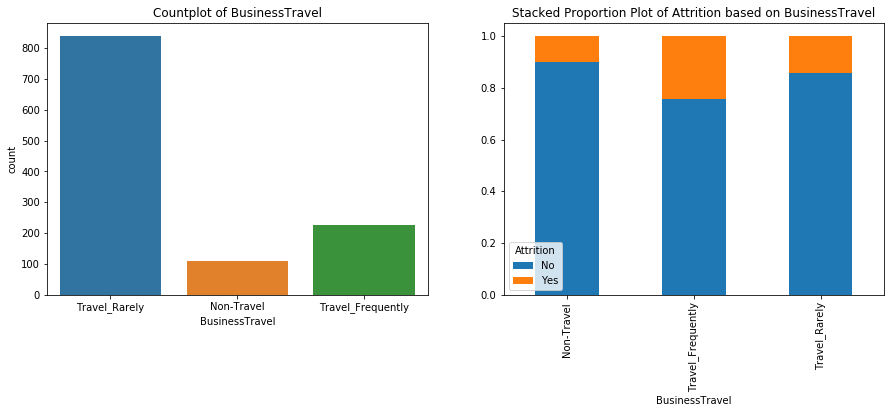

In [54]:
print("From the plots we can see that the proportion of the people with Attrition=Yes is higher for people who have don't " 
      "travel or travel rarely. We can conclude that travelling is an important factor in deciding the attrition rate")
fig,ax=plt.subplots(1,2,figsize=(15,5))
df_plot = data.groupby(["Attrition", "BusinessTravel"]).size().reset_index().pivot(columns="Attrition", index="BusinessTravel", values=0)
sns.countplot(data["BusinessTravel"],ax=ax[0]).set_title("Countplot of BusinessTravel");
df_plot.div(df_plot.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax[1]);
ax[1].set_title("Stacked Proportion Plot of Attrition based on BusinessTravel");

From the plots we can see that the proportion of the people with Attrition=Yes is higher for people who work overtime. As expected employees won't like to work overtime so they will leave their job.


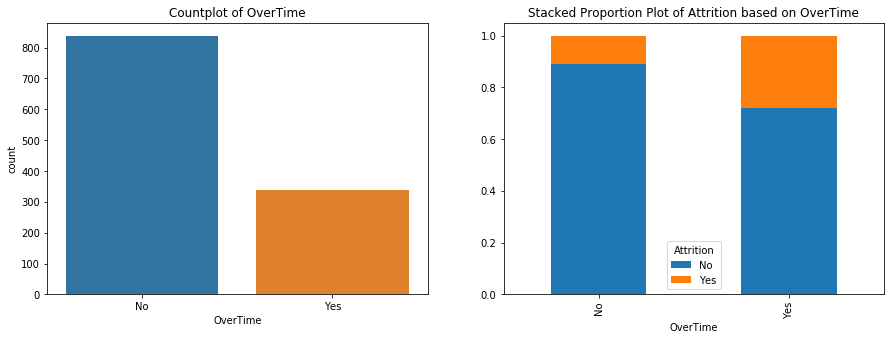

In [55]:
print("From the plots we can see that the proportion of the people with Attrition=Yes is higher for people who work overtime. As " 
      "expected employees won't like to work overtime so they will leave their job.")
fig,ax=plt.subplots(1,2,figsize=(15,5))
df_plot = data.groupby(["Attrition", "OverTime"]).size().reset_index().pivot(columns="Attrition", index="OverTime", values=0)
sns.countplot(data["OverTime"],ax=ax[0]).set_title("Countplot of OverTime");
df_plot.div(df_plot.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax[1]);
ax[1].set_title("Stacked Proportion Plot of Attrition based on OverTime");

From the plots we can see that the proportion of the people with Attrition=Yes is higher for young group of people .Maybe because during early stage of the career people frequently change their job.


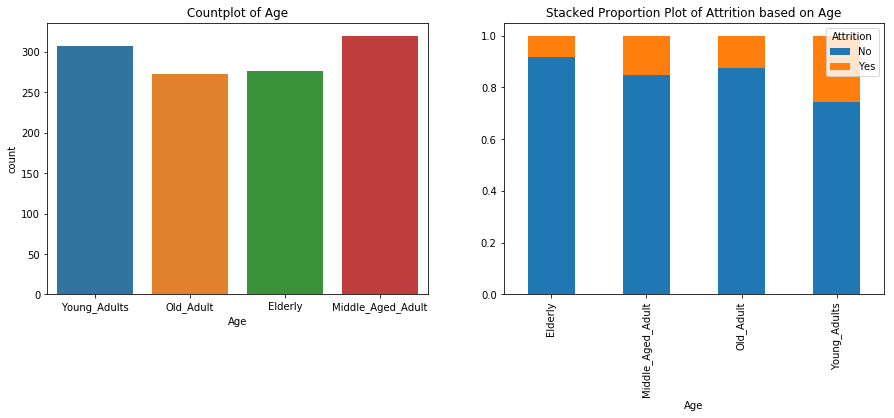

In [56]:
print("From the plots we can see that the proportion of the people with Attrition=Yes is higher for young group of people" 
      " .Maybe because during early stage of the career people frequently change their job.")
fig,ax=plt.subplots(1,2,figsize=(15,5))
df_plot = data.groupby(["Attrition", "Age"]).size().reset_index().pivot(columns="Attrition", index="Age", values=0)
sns.countplot(data["Age"],ax=ax[0]).set_title("Countplot of Age");
df_plot.div(df_plot.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax[1]);
ax[1].set_title("Stacked Proportion Plot of Attrition based on Age");

# Apriori Model

*Creates a dataframe with each cell having the column name and the corresponding value for the column and that row.*

In [57]:
data_new=pd.DataFrame({col:str(col)+"=" for col in data},index=data)
for col in data.columns:
    data_new[col]=data_new[col].str.cat(data[col],sep=" ")

In [58]:
transaction_rows=[list(data_new.iloc[i].values) for i in range(len(data_new))] #Converts the dataframe into list of lists

In [59]:
te = TransactionEncoder()
te_ary = te.fit(transaction_rows).transform(transaction_rows) # Fits the trnsaction encoder and tranfroms the dataframe 
                                                              # into transactions
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)        # Converts all the transaction again into a dataframe

In [60]:
apriori_default=apriori(apriori_df,use_colnames=True)

In [61]:
baseline_model_rules=association_rules(apriori_default, metric="lift", min_threshold=1)

*Below we have run a baseline model, we list all the results by descending order of lift. Here, we do not use any particular
set of consequents. From our baseline model we can notice that there are many rules whose length is less than 3.*

In [62]:
baseline_model_rules.sort_values("lift",ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(OverTime= No),(Attrition= No),0.713435,0.842687,0.636054,0.891538,1.057970,0.034852,1.450391
3,(Attrition= No),(OverTime= No),0.842687,0.713435,0.636054,0.754793,1.057970,0.034852,1.168665
6,"(OverTime= No, PerformanceRating= 3.0)",(Attrition= No),0.596939,0.842687,0.531463,0.890313,1.056517,0.028430,1.434204
9,(Attrition= No),"(OverTime= No, PerformanceRating= 3.0)",0.842687,0.596939,0.531463,0.630676,1.056517,0.028430,1.091349
7,"(PerformanceRating= 3.0, Attrition= No)",(OverTime= No),0.709184,0.713435,0.531463,0.749400,1.050411,0.025506,1.143516
8,(OverTime= No),"(PerformanceRating= 3.0, Attrition= No)",0.713435,0.709184,0.531463,0.744934,1.050411,0.025506,1.140163
25,(Attrition= No),(Department= Research & Development),0.842687,0.649660,0.567177,0.673058,1.036015,0.019717,1.071565
24,(Department= Research & Development),(Attrition= No),0.649660,0.842687,0.567177,0.873037,1.036015,0.019717,1.239042
19,(BusinessTravel= Travel_Rarely),"(PerformanceRating= 3.0, Attrition= No)",0.713435,0.709184,0.518707,0.727056,1.025201,0.012751,1.065480
18,"(PerformanceRating= 3.0, Attrition= No)",(BusinessTravel= Travel_Rarely),0.709184,0.713435,0.518707,0.731415,1.025201,0.012751,1.066942


In [63]:
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)

## Attrition: Yes

Below we have ran the model with consequent as Attrition=Yes.

In [64]:
attrition_yes=SupervisedApriori(apriori_df,["Attrition= Yes"],min_supp=.04,min_conf=.4,min_lift=1)

In [65]:
attrition_yes.sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,"(OverTime= Yes, JobLevel= 1.0, YearsSinceLastPromotion= Few)",(Attrition= Yes),0.092687,0.157313,0.045068,0.486239,3.090900,0.030487,1.640230
41,"(OverTime= Yes, JobLevel= 1.0)",(Attrition= Yes),0.102041,0.157313,0.049320,0.483333,3.072432,0.033267,1.631007
39,"(OverTime= Yes, StockOptionLevel= 0, MaritalStatus= Single)",(Attrition= Yes),0.086735,0.157313,0.040816,0.470588,2.991415,0.027172,1.591742
10,"(OverTime= Yes, MaritalStatus= Single)",(Attrition= Yes),0.086735,0.157313,0.040816,0.470588,2.991415,0.027172,1.591742
74,"(StockOptionLevel= 0, TotalWorkingYears= Fresher, YearsAtCompany= Few, YearsWithCurrManager= Few)",(Attrition= Yes),0.090986,0.157313,0.041667,0.457944,2.911038,0.027353,1.554612


In [66]:
for i in attrition_yes.sort_values("lift",ascending=False).head().index:
    print(attrition_yes.loc[i]["antecedents"])

frozenset({'OverTime= Yes', 'JobLevel= 1.0', 'YearsSinceLastPromotion= Few'})
frozenset({'OverTime= Yes', 'JobLevel= 1.0'})
frozenset({'OverTime= Yes', 'StockOptionLevel= 0', 'MaritalStatus= Single'})
frozenset({'OverTime= Yes', 'MaritalStatus= Single'})
frozenset({'StockOptionLevel= 0', 'TotalWorkingYears= Fresher', 'YearsAtCompany= Few', 'YearsWithCurrManager= Few'})


## Attrition=No

*Below we have ran the model with consequent as Attrition=No.*

In [67]:
attrition_no=SupervisedApriori(apriori_df,["Attrition= No"],min_supp=.3,min_conf=.9,min_lift=1)

In [68]:
attrition_no.sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(Department= Research & Development, OverTime= No, BusinessTravel= Travel_Rarely)",(Attrition= No),0.338435,0.842687,0.310374,0.917085,1.088287,0.025179,1.897289
4,"(Department= Research & Development, OverTime= No, PerformanceRating= 3.0)",(Attrition= No),0.380102,0.842687,0.347789,0.914989,1.085799,0.027482,1.850497
2,"(Department= Research & Development, OverTime= No)",(Attrition= No),0.463435,0.842687,0.422619,0.911927,1.082165,0.032088,1.786157
12,"(OverTime= No, PerformanceRating= 3.0, JobInvolvement= 3)",(Attrition= No),0.346939,0.842687,0.316327,0.911765,1.081973,0.023966,1.782880
1,"(MaritalStatus= Married, OverTime= No)",(Attrition= No),0.335034,0.842687,0.305272,0.911168,1.081264,0.022943,1.770894


In [69]:
for i in attrition_no.sort_values("lift",ascending=False).head().index:
    print(attrition_no.loc[i]["antecedents"])

frozenset({'Department= Research & Development', 'OverTime= No', 'BusinessTravel= Travel_Rarely'})
frozenset({'Department= Research & Development', 'OverTime= No', 'PerformanceRating= 3.0'})
frozenset({'Department= Research & Development', 'OverTime= No'})
frozenset({'OverTime= No', 'PerformanceRating= 3.0', 'JobInvolvement= 3'})
frozenset({'MaritalStatus= Married', 'OverTime= No'})


***Conclusion(Attrition=Yes): The rules that we have got have a high lift of 3 and the confidence is above .45. So, one thing we 
can say about the rules is that it is not caused due to randomness. One interesting thing that we can see from 
the rule is that employee who have no stock option tend to leave the comapany. The no stock option is seen in 2 out of the top 5 rules. The set of conditions that make the LHS are something that we expected because from the data visualization above we saw a similar behavior.Variables like TotalWorkingYears= Fresher,JobLevel= 1, Overtime=Yes, Marital Status=Yes is present in most of the top 5 rules which is expected.***

***Conclusion(Attrition=No): The rules that we have got have a lift greater than 1 so we can say that there is some relationship between the antecedents and the consequents. Our confidence is very high meaning that our rules are very significant. We have got people R&D frequently in our top 5 rules because may be people who perform research tend to stay longer to continue with their research. The reason for Performance Rating =3 is present in our rules may be due to the frequency with which it occurs our data.***